# Stock Price Forecasting
In this notebook, we use historical stock data to predict the stock's closing price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Stock_Data.csv')
df.head()

,Open,High,Low,Close,Volume
0,100,106,99,104,1000000
1,105,108,103,107,1100000
2,102,107,100,105,1050000
3,108,112,106,110,1150000
4,110,115,109,113,1200000


In [3]:
df.describe()

,Open,High,Low,Close,Volume
count,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,105.000000,109.600000,103.400000,107.800000,1.100000e+06
std,4.123106,3.781534,4.159327,3.701351,7.905694e+04
min,100.000000,106.000000,99.000000,104.000000,1.000000e+06
25%,102.000000,107.000000,100.000000,105.000000,1.050000e+06
50%,105.000000,108.000000,103.000000,107.000000,1.100000e+06
75%,108.000000,112.000000,106.000000,110.000000,1.150000e+06
max,110.000000,115.000000,109.000000,113.000000,1.200000e+06


In [4]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

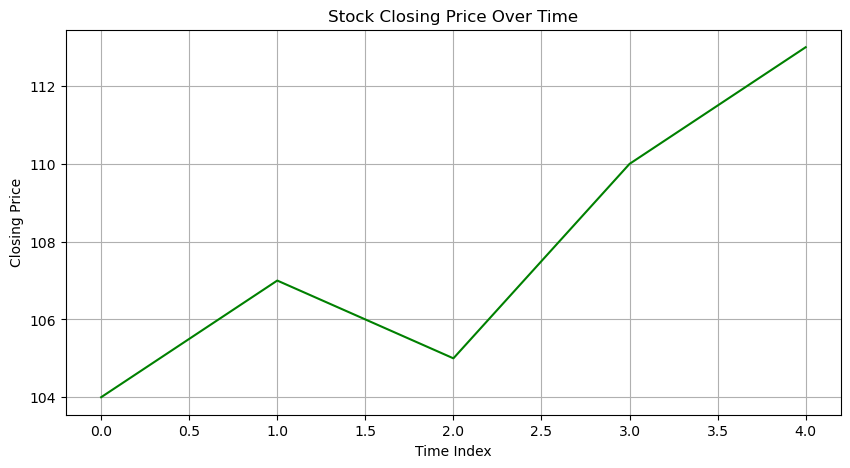

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'], color='green')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Time Index')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [6]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
predicted = lr_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, predicted))
print(f'RMSE for Stock Price Prediction: {error:.2f}')

RMSE for Stock Price Prediction: 0.36


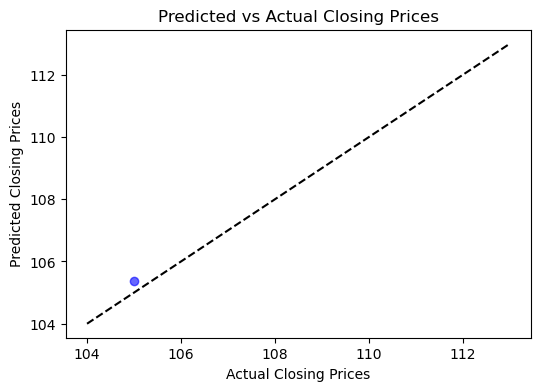

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, predicted, alpha=0.6, color='blue')
plt.xlabel('Actual Closing Prices')
plt.ylabel('Predicted Closing Prices')
plt.title('Predicted vs Actual Closing Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.show()